In [46]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
from tqdm import tqdm

sys.path.append(os.environ.get('PATH_OPENSKY'))
from user_eval import get_df_posts 
from news_outlet_eval import get_news_feed, get_posts_from_nos

dotenv.load_dotenv('.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

PATH_RESULTS = os.environ.get('PATH_OPENSKY') + 'results/'
PATH_USER_REPLIES_NEWS = PATH_RESULTS + 'agg_user_replies_news.csv'
PATH_USER_REPLIES_NEWS_POSTS = PATH_RESULTS + 'agg_user_replies_news_posts.csv'

PATH_FEED_POSTS = PATH_DATA + 'feed_posts/'

df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)

/tmp/ipykernel_153640/2645922412.py:22: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_USER_REPLIES_NEWS_POSTS)


In [11]:
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657080,284413,bsky.social,1976-05-31 14:32:20.803,let’s hope his expands ten fold 💪💪,['eng'],0,0,0,10657081.0,15717.0,10657081.0,15717.0,NaN,NaN,NaN,NaN,NaN,2.0,0.945
1,10657084,284413,bsky.social,1976-05-31 14:32:02.212,"yes, we can do this! 💪",['eng'],3,0,0,5595208.0,2486.0,5595208.0,2486.0,NaN,NaN,NaN,NaN,NaN,2.0,0.956
2,10657085,284413,bsky.social,1976-05-31 14:31:51.419,"in other words, “as long as it takes” it refer...",['eng'],0,1,0,10657086.0,12030.0,10657086.0,12030.0,NaN,NaN,NaN,NaN,NaN,1.0,0.583
3,10657096,284413,bsky.social,1976-05-31 14:31:21.410,i’ll believe it when i see the weapons in Ukra...,['eng'],0,0,0,10657097.0,15717.0,10657097.0,15717.0,NaN,NaN,NaN,NaN,NaN,1.0,0.509
4,10657117,284413,bsky.social,1976-05-31 14:30:50.922,Expect the world to become way way worse. If a...,['eng'],1,0,0,5271912.0,15717.0,5271912.0,15717.0,NaN,NaN,NaN,NaN,NaN,0.0,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36816,171050451,141248,bsky.social,1976-05-31 15:04:51.347,La preuve qu'ils sont antidémocratiques. \nPer...,"['eng', 'fra']",4,0,0,5550653.0,4890.0,5550653.0,4890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36817,105014318,92560,bsky.social,1976-05-31 15:04:40.159,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.790
36818,105014322,92560,bsky.social,1976-05-31 15:04:32.216,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.867
36819,105014501,92560,bsky.social,1976-05-31 14:30:50.808,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.882


In [12]:
df.dropna(subset=['sent_score'], inplace=True)
df

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,repost_from,reposted_author,quotes,quoted_author,labels,sent_label,sent_score
0,10657080,284413,bsky.social,1976-05-31 14:32:20.803,let’s hope his expands ten fold 💪💪,['eng'],0,0,0,10657081.0,15717.0,10657081.0,15717.0,NaN,NaN,NaN,NaN,NaN,2.0,0.945
1,10657084,284413,bsky.social,1976-05-31 14:32:02.212,"yes, we can do this! 💪",['eng'],3,0,0,5595208.0,2486.0,5595208.0,2486.0,NaN,NaN,NaN,NaN,NaN,2.0,0.956
2,10657085,284413,bsky.social,1976-05-31 14:31:51.419,"in other words, “as long as it takes” it refer...",['eng'],0,1,0,10657086.0,12030.0,10657086.0,12030.0,NaN,NaN,NaN,NaN,NaN,1.0,0.583
3,10657096,284413,bsky.social,1976-05-31 14:31:21.410,i’ll believe it when i see the weapons in Ukra...,['eng'],0,0,0,10657097.0,15717.0,10657097.0,15717.0,NaN,NaN,NaN,NaN,NaN,1.0,0.509
4,10657117,284413,bsky.social,1976-05-31 14:30:50.922,Expect the world to become way way worse. If a...,['eng'],1,0,0,5271912.0,15717.0,5271912.0,15717.0,NaN,NaN,NaN,NaN,NaN,0.0,0.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36815,65305778,347274,bsky.social,1976-05-30 13:31:01.929,"to be fair (I am an impartial observer), FWIW ...",['eng'],1,2,0,6050346.0,1739372.0,6050347.0,379.0,NaN,NaN,NaN,NaN,NaN,1.0,0.644
36817,105014318,92560,bsky.social,1976-05-31 15:04:40.159,What a complete abdication of good journalism ...,['eng'],0,0,0,698597.0,9.0,698597.0,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.790
36818,105014322,92560,bsky.social,1976-05-31 15:04:32.216,Trump and Biden are at par with age...exactly ...,['eng'],4,0,0,127576.0,379.0,127576.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.867
36819,105014501,92560,bsky.social,1976-05-31 14:30:50.808,Because doctors are literally refusing to pres...,['eng'],1,0,0,145919.0,379.0,145919.0,379.0,NaN,NaN,NaN,NaN,NaN,0.0,0.882


<Axes: >

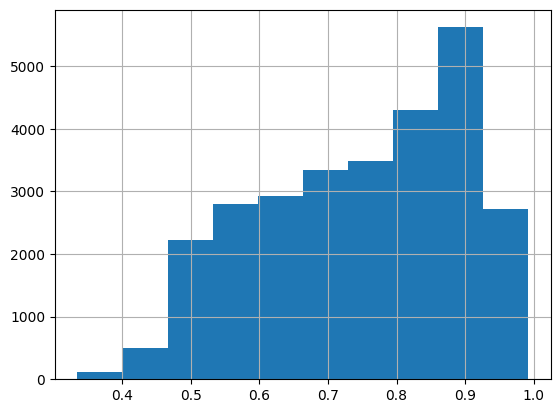

In [13]:
df.sent_score.hist()

<Axes: >

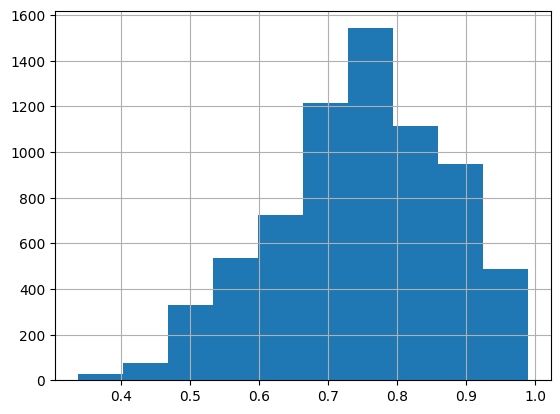

In [14]:
df.groupby('user_id').sent_score.mean().hist()

<Axes: >

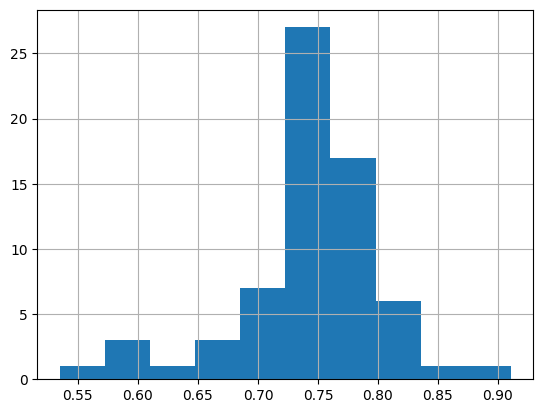

In [16]:
df.groupby('thread_root_author').sent_score.mean().hist()

In [ ]:
df.thread_root_a

In [23]:
df_describe = df.loc[:, ['like_count', 'reply_count', 'repost_count', 'thread_root_author', 'sent_label', 'sent_score']].groupby('thread_root_author').describe()
df_describe

like_count                                               \
                        count       mean         std  min   25%  50%   75%   
thread_root_author                                                           
9.0                    2784.0  19.309267   57.049218  0.0  0.00  2.0  9.00   
114.0                   919.0   2.706202    6.507133  0.0  0.00  1.0  2.00   
319.0                  6792.0  16.522674  103.052807  0.0  0.00  1.0  5.00   
379.0                 10181.0   8.652686   34.537631  0.0  0.00  1.0  4.00   
625.0                     9.0   0.777778    1.301708  0.0  0.00  0.0  1.00   
...                       ...        ...         ...  ...   ...  ...   ...   
273835.0                 14.0   0.500000    1.160239  0.0  0.00  0.0  0.00   
283857.0                  6.0   2.000000    2.966479  0.0  1.00  1.0  1.00   
296757.0                  1.0   1.000000         NaN  1.0  1.00  1.0  1.00   
508098.0                  6.0   1.166667    1.602082  0.0  0.00  0.5  1.75   
967583.0                  4.0   1.750000    1.500000  0.0  0.75  2.0  3.00   

                           reply_count            ... sent_label       \
                       max       count      mean  ...        75%  max   
thread_root_author                                ...                   
9.0                  535.0      2784.0  0.781609  ...        1.0  2.0   
114.0                 71.0       919.0  0.520131  ...        1.0  2.0   
319.0               1378.0      6792.0  0.696702  ...        1.0  2.0   
379.0                692.0     10181.0  0.569198  ...        1.0  2.0   
625.0                  4.0         9.0  0.000000  ...        2.0  2.0   
...                    ...         ...       ...  ...        ...  ...   
273835.0               4.0        14.0  0.000000  ...        1.0  2.0   
283857.0               8.0         6.0  0.500000  ...        1.0  2.0   
296757.0               1.0         1.0  0.000000  ...        2.0  2.0   
508098.0               4.0         6.0  0.000000  ...        2.0  2.0   
967583.0               3.0         4.0  0.500000  ...        2.0  2.0   

                   sent_score                                              \
                        count      mean       std    min      25%     50%   
thread_root_author                                                          
9.0                    2784.0  0.757278  0.146083  0.335  0.64700  0.7820   
114.0                   919.0  0.726209  0.145763  0.371  0.60600  0.7360   
319.0                  6792.0  0.745461  0.145553  0.341  0.62700  0.7670   
379.0                 10181.0  0.750870  0.146718  0.346  0.63200  0.7740   
625.0                     9.0  0.703667  0.122985  0.516  0.60000  0.7080   
...                       ...       ...       ...    ...      ...     ...   
273835.0                 14.0  0.739357  0.154109  0.412  0.66275  0.7675   
283857.0                  6.0  0.749333  0.146071  0.593  0.62000  0.7410   
296757.0                  1.0  0.709000       NaN  0.709  0.70900  0.7090   
508098.0                  6.0  0.801667  0.207670  0.501  0.65050  0.9000   
967583.0                  4.0  0.799500  0.133280  0.642  0.72900  0.7990   

                                    
                        75%    max  
thread_root_author                  
9.0                 0.88300  0.991  
114.0               0.85400  0.986  
319.0               0.87400  0.990  
379.0               0.88100  0.992  
625.0               0.78700  0.900  
...                     ...    ...  
273835.0            0.83075  0.979  
283857.0            0.87850  0.917  
296757.0            0.70900  0.709  
508098.0            0.94250  0.985  
967583.0            0.86950  0.958  

[67 rows x 40 columns]

In [25]:
df.groupby('thread_root_author').sent_score.mean().sort_values()

thread_root_author
11193.0     0.535000
63352.0     0.589000
23869.0     0.591200
75975.0     0.607000
43521.0     0.628750
              ...   
19408.0     0.807951
190564.0    0.817000
17630.0     0.822000
8643.0      0.858667
17638.0     0.910667
Name: sent_score, Length: 67, dtype: float64

In [43]:
df_news_feed = pd.read_json(PATH_FEED_POSTS + 'News.jsonl.gz', lines=True)
df_zb = df_news_feed.loc[df_news_feed.user_id == 11193, :]
df_zb

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,quotes,quoted_author,labels
710,39186937,11193,press,1976-05-31 15:06:02.039,Journalists “make their bread and butter by ma...,[eng],4,0,1,NaN,NaN,NaN,NaN,NaN,NaN,None
992,39186938,11193,press,1976-05-31 15:05:51.926,Sen. Chuck Grassley should stand up for the Fi...,[eng],0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,None
1495,39186939,11193,press,1976-05-31 15:05:42.007,From the U.S. Press Freedom Tracker: A San Fra...,[eng],1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,None
1955,10740121,11193,press,1976-05-31 15:05:32.143,An Israeli tank killed Reuters reporter Issam ...,[eng],66,1,58,NaN,NaN,NaN,NaN,NaN,NaN,None
2490,10740281,11193,press,1976-05-31 15:05:21.846,“No one involved in this shift towards encrypt...,[eng],4,0,3,NaN,NaN,NaN,NaN,NaN,NaN,None
2872,39186943,11193,press,1976-05-31 15:05:12.214,The Media Are Getting Easier to Push Around: A...,[eng],2,0,3,NaN,NaN,NaN,NaN,NaN,NaN,None
2989,39186944,11193,press,1976-05-31 15:05:11.655,New from the U.S. Press Freedom Tracker:\n\nTh...,[eng],3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,None
12028,39186947,11193,press,1976-05-31 14:49:11.836,Prosecuting Julian Assange threatens journalis...,[eng],2,0,2,NaN,NaN,NaN,NaN,NaN,NaN,None
12392,39186949,11193,press,1976-05-31 14:49:02.315,Over 35 law professors told the Department of ...,[eng],4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,None
12422,39186950,11193,press,1976-05-31 14:49:02.038,From the U.S. Press Freedom Tracker: Journalis...,[eng],8,0,4,NaN,NaN,NaN,NaN,NaN,NaN,None


In [48]:
df_zb = get_posts_from_nos(379)
df_zb

,post_id,user_id,instance,date,text,langs,like_count,reply_count,repost_count,reply_to,replied_author,thread_root,thread_root_author,quotes,quoted_author,labels
7,3753243,379,com,1976-05-31 15:06:22.341,"A conservative social media influencer, Isabel...",[eng],153,12,26,NaN,NaN,NaN,NaN,NaN,NaN,None
13,7955093,379,com,1976-05-31 15:06:22.316,"An engine fire, a tire lost shortly after take...",[eng],50,3,14,NaN,NaN,NaN,NaN,NaN,NaN,None
16,697660,379,com,1976-05-31 15:06:22.306,Donald Trump accused Jewish voters of hating t...,[eng],55,16,18,NaN,NaN,NaN,NaN,NaN,NaN,None
24,5425802,379,com,1976-05-31 15:06:22.231,A second man has been charged in connection wi...,[eng],35,1,3,NaN,NaN,NaN,NaN,NaN,NaN,None
37,23172259,379,com,1976-05-31 15:06:22.148,Of all the classroom visits the author Tommy O...,[eng],24,0,4,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41774,23172811,379,com,1976-05-30 12:40:41.814,"Thousands of beagles, bred for research, were ...",[eng],51,3,10,NaN,NaN,NaN,NaN,NaN,NaN,None
41843,14991203,379,com,1976-05-30 12:40:32.037,Breaking News: Donald Trump pleaded not guilty...,[eng],45,1,16,NaN,NaN,NaN,NaN,NaN,NaN,None
41966,13790023,379,com,1976-05-30 12:27:31.816,Breaking News: The Education Department opened...,[eng],71,0,27,NaN,NaN,NaN,NaN,NaN,NaN,None
42017,195973,379,com,1976-05-30 12:25:32.232,Breaking News: A WHO panel called the widely u...,[eng],12,1,7,NaN,NaN,NaN,NaN,NaN,NaN,None


In [45]:
df.groupby('thread_root_author').sent_score.count().sort_values(ascending=False)

thread_root_author
379.0       10181
319.0        6792
9.0          2784
626.0        1631
27155.0      1424
            ...  
63352.0         1
132107.0        1
75975.0         1
190564.0        1
296757.0        1
Name: sent_score, Length: 67, dtype: int64